In [74]:
# import numpy as np
import torch
from matplotlib import pyplot as plt
from tqdm import trange

def square(x):
  return x**2

print(square(5))

25


In [77]:
def derivative(f, x, h=1e-4):
  fx1 = f(x-h)
  fx2 = f(x+h)
  return (fx2 - fx1) / (2*h)

print(derivative(square, 0))
print(derivative(square, 1))

0.0
1.9999999999992246


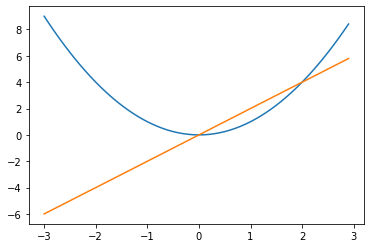

In [78]:
xs = torch.arange(-3, 3, 0.1)
xs_square = [square(x) for x in xs]
estimated_derivatives = [derivative(square, x) for x in xs]
plt.plot(xs, xs_square)
plt.plot(xs, estimated_derivatives)
plt.show()

-0.7103259175156689 -1.4206518350312614
-0.5682607340125427 -1.136521468024787
-0.45460858721006403 -0.9092171744200239
-0.36368686976806164 -0.7273737395360746
-0.2909494958144542 -0.581898991628832
-0.23275959665157098 -0.4655191933030864
-0.18620767732126234 -0.37241535464246217
-0.14896614185701612 -0.29793228371400093
-0.11917291348561602 -0.23834582697124412
-0.0953383307884916 -0.19067666157698662


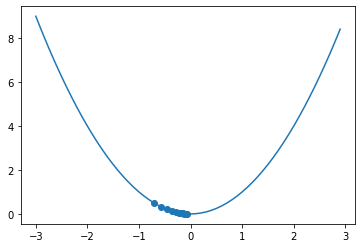

In [79]:
import numpy as np
x0 = np.random.uniform(-3, 3)
xi = x0
step_size = 1e-1
xis = [x0]
for i in range(10):
  g = derivative(square, xi)
  print(xi, g)
  xi = xi - g * step_size
  xis.append(xi)
plt.plot(xs, xs_square)
plt.scatter(xis, [square(x) for x in xis])
plt.show()

tensor([4., 6.])
tensor([[1., 2.],
        [3., 4.],
        [4., 6.]])


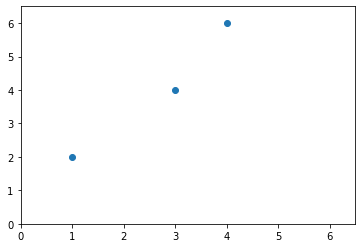

In [80]:
vector1 = torch.Tensor([1, 2])
vector2 = torch.Tensor([3, 4])
vector3 = vector1 + vector2
print(vector3)
stack = torch.stack([vector1, vector2, vector3])
print(stack)
plt.scatter(stack[:, 0], stack[:, 1])
plt.xlim(0, 6.5)
plt.ylim(0, 6.5)
plt.show()

In [81]:
vector4 = torch.Tensor([1, 2, 3])
print(vector4 * 2)

tensor([2., 4., 6.])


In [82]:
vector1 = torch.Tensor([1, 2]).float()
vector2 = torch.Tensor([3, 4]).float()
vector3 = torch.Tensor([5, 6]).float()
print(sum([vector1, vector2, vector3]) / 3)

tensor([3., 4.])


In [83]:
vectors = torch.stack([vector1, vector2, vector3])
print(vectors)
print(vectors.mean(axis=0, dtype=torch.float))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([3., 4.])


In [84]:
vector4 = torch.Tensor([1, 2, 3])
vector5 = torch.Tensor([4, 5, 6])
print(vector4.dot(vector5))
print(torch.dot(vector4, vector5))

tensor(32.)
tensor(32.)


In [85]:
def sum_of_squares(vec):
  return sum([e * e for e in vec])

vector4 = torch.Tensor([1, 2, 3])
print(sum_of_squares(vector4))
print(torch.dot(vector4, vector4))

tensor(14.)
tensor(14.)


In [87]:
vector6 = torch.Tensor([3, 4])
print(torch.sqrt(torch.dot(vector6, vector6)))
print(torch.linalg.norm(vector6))

tensor(5.)
tensor(5.)


In [88]:
A = torch.arange(6).reshape(3, 2)
B = torch.arange(6).reshape(3, 2) - 3
print(A)
print(B)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[-3, -2],
        [-1,  0],
        [ 1,  2]])


In [91]:
print(A * B)
print(A.dot(B.transpose(0, 0)))

tensor([[ 0, -2],
        [-2,  0],
        [ 4, 10]])


TypeError: transpose() received an invalid combination of arguments - got (), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


In [92]:
def sum_of_squares(xs):
  return sum([x * x for x in xs])

def gradient(f, xs, h=1e-6):
  derivs = []
  for i in range(len(xs)):
    xs_ = torch.detach(xs)
    xs_[i] += h
    fx2 = f(xs_)
    xs_[i] -= 2*h
    fx1 = f(xs_)
    derivs.append((fx2 - fx1) / (2*h))
  return torch.Tensor(derivs)

In [93]:
xs = torch.Tensor([4., 2.])
gs = gradient(sum_of_squares, xs)
gs, xs

(tensor([7.6294, 3.8147]), tensor([4.0000, 2.0000]))

In [94]:
x0 = torch.randn(2) * 3
xi = x0
step_size = 1e-1
xis = [x0]
for i in range(50):
  g = gradient(sum_of_squares, xi)
  print(xi, g)
  xi = xi - g * step_size
  xis.append(xi)
print(xi)

tensor([-0.3609,  0.6975]) tensor([-0.7451,  1.4007])
tensor([-0.2864,  0.5575]) tensor([-0.5662,  1.1325])
tensor([-0.2297,  0.4442]) tensor([-0.4470,  0.8941])
tensor([-0.1850,  0.3548]) tensor([-0.3725,  0.7004])
tensor([-0.1478,  0.2848]) tensor([-0.2943,  0.5700])
tensor([-0.1183,  0.2278]) tensor([-0.2347,  0.4545])
tensor([-0.0949,  0.1823]) tensor([-0.1881,  0.3651])
tensor([-0.0761,  0.1458]) tensor([-0.1518,  0.2915])
tensor([-0.0609,  0.1167]) tensor([-0.1220,  0.2328])
tensor([-0.0487,  0.0934]) tensor([-0.0973,  0.1863])
tensor([-0.0390,  0.0748]) tensor([-0.0780,  0.1492])
tensor([-0.0312,  0.0598]) tensor([-0.0622,  0.1197])
tensor([-0.0249,  0.0479]) tensor([-0.0499,  0.0957])
tensor([-0.0199,  0.0383]) tensor([-0.0399,  0.0766])
tensor([-0.0160,  0.0306]) tensor([-0.0319,  0.0612])
tensor([-0.0128,  0.0245]) tensor([-0.0255,  0.0490])
tensor([-0.0102,  0.0196]) tensor([-0.0204,  0.0392])
tensor([-0.0082,  0.0157]) tensor([-0.0163,  0.0314])
tensor([-0.0065,  0.0125]) t

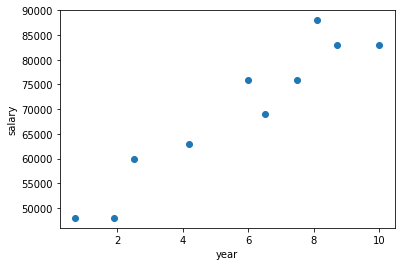

In [95]:
salary_and_year = [[83000, 8.7],
                  [88000, 8.1],
                  [48000, 0.7],
                  [76000, 6],
                  [69000, 6.5],
                  [76000, 7.5],
                  [60000, 2.5],
                  [83000, 10],
                  [48000, 1.9],
                  [63000, 4.2]]
data = torch.Tensor(salary_and_year)
salaries = data[:, 0]
years = data[:, 1]
plt.scatter(years, salaries)
plt.xlabel('year')
plt.ylabel('salary')
A = torch.stack([years, torch.ones(years.shape)], axis=1)
s = salaries

In [96]:
guess = torch.Tensor([1000., 10000.])
print(guess)
s_hat = torch.dot(A, guess)
print(s_hat)
print(s)
errors = s - s_hat
error = torch.dot(errors.transpose(), errors) / A.shape[0]
print(errors)
print(error)

def compute_error(current_model, A, s):
  errors = s - torch.dot(A, current_model)
  return torch.dot(errors.transpose(), errors) / A.shape[0]

from functools import partial
compute_error_As = partial(compute_error, A=A, s=s)
print(compute_error_As(current_model=guess))

tensor([ 1000., 10000.])


RuntimeError: 1D tensors expected, but got 2D and 1D tensors

In [104]:
# check the gradient by closed form equation: g = 2A^Ts + 2A^TAx
(-2 * torch.dot(A.transpose(), s) + 2 * torch.dot(torch.dot(A.transpose(), A), guess) ) / A.shape[0]

TypeError: transpose() received an invalid combination of arguments - got (), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


  0%|          | 0/10000 [00:00<?, ?it/s]


NameError: name 'compute_error' is not defined

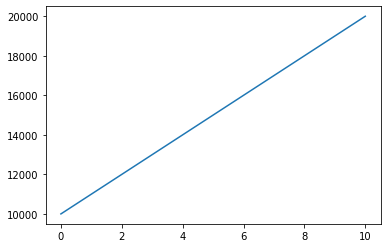

In [105]:
xi = torch.Tensor([1000., 10000.])
step_size = 1e-3
xis = [xi]
# errors = [compute_error_As(current_model=xi)]
# print(xi, error)
plt.plot((0, 10), (xi[1], xi[0]*10+xi[1]))
losses = []
for i in trange(10000):
  xi.requires_grad = True
  loss = compute_error(xi, A, s)
  loss.backward()
  xi = (xi - xi.grad * step_size).detach()
  # g = gradient(compute_error_As, xi)
  # xi = xi - g * step_size
  # error = compute_error_As(current_model=xi)
  # # print(xi, g, error)
  xis.append(xi)
  losses.append(loss)
  # errors.append(compute_error_As(current_model=xi))
  plt.plot((0, 10), (xi[1], xi[0]*10+xi[1]))
plt.scatter(years, salaries)
plt.xlabel('year')
plt.ylabel('salary')
plt.show()
plt.plot(range(len(losses)), losses)
# plt.plot(range(len(errors)), errors)
plt.show()
print(loss)
# print(errors[-1])
print(xi)